# 1. Import 

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import  matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 2. Load and analyze data

In [40]:
df = pd.read_csv('House Price Prediction Dataset.csv')
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [41]:
df.shape

(2000, 10)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [43]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [44]:
df = df.drop('Id',axis=1)

# 3. Convert categorical data into numerical

In [45]:
label = LabelEncoder()
df['Location'] = label.fit_transform(df['Location'])

df['Condition'] = label.fit_transform(df['Condition'])

df['Garage'] = label.fit_transform(df['Garage'])

In [46]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,0,0,0,149919
1,4272,5,4,3,1958,0,0,0,424998
2,3592,2,2,3,1938,0,2,0,266746
3,966,4,2,2,1902,2,1,1,244020
4,4926,1,4,2,1975,0,1,1,636056


# 4. Remove outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x21d68f9f470>,
 'caps': [<matplotlib.lines.Line2D at 0x21d68f9faa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d68f9f1a0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d68fc00e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d68fc0380>],
 'means': []}

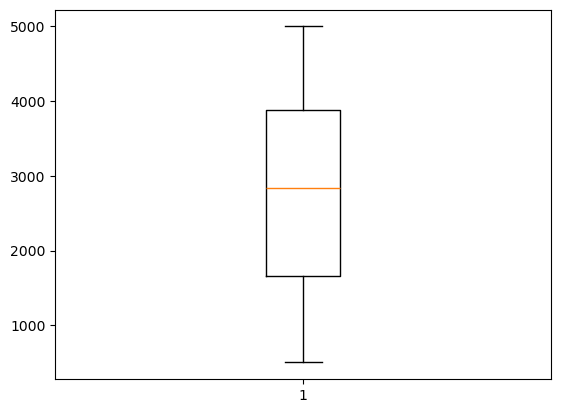

In [47]:
plt.boxplot(df['Area'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d68fdeff0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d68fdf5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d68fded20>],
 'medians': [<matplotlib.lines.Line2D at 0x21d68fdfa70>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d68fdfce0>],
 'means': []}

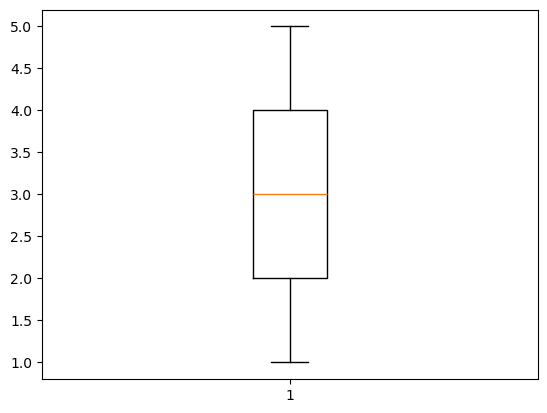

In [48]:
plt.boxplot(df['Bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d69037b60>,
 'caps': [<matplotlib.lines.Line2D at 0x21d6904c140>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d69037890>],
 'medians': [<matplotlib.lines.Line2D at 0x21d6904c740>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d6904c9b0>],
 'means': []}

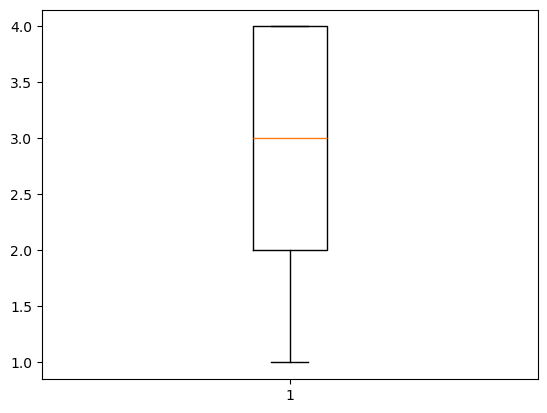

In [49]:
plt.boxplot(df['Bathrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d691b69f0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d691b6ea0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d691b6780>],
 'medians': [<matplotlib.lines.Line2D at 0x21d691b7470>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d691b7680>],
 'means': []}

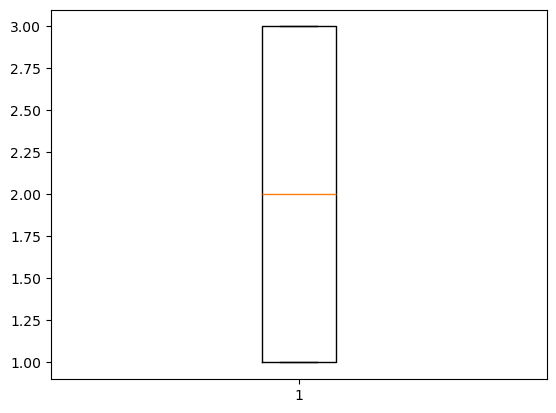

In [50]:
plt.boxplot(df['Floors'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d6920aea0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d6920b440>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d6920abd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d6920b8c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d6920bb90>],
 'means': []}

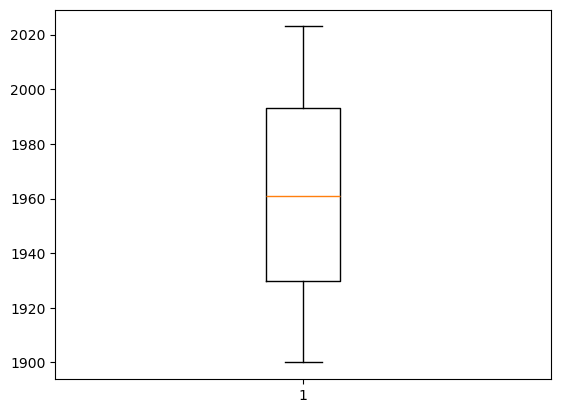

In [51]:
plt.boxplot(df['YearBuilt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d69269cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d6926a240>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d69269af0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d6926a810>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d6926aab0>],
 'means': []}

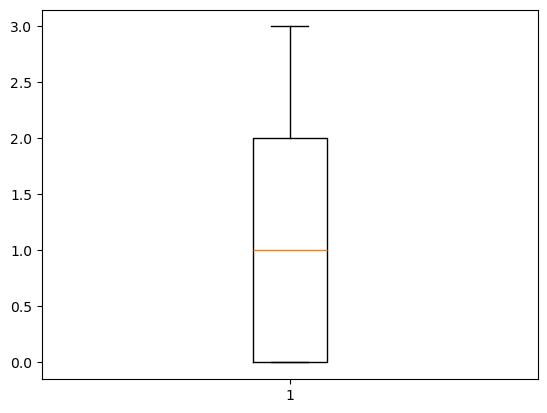

In [52]:
plt.boxplot(df['Location'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d692f06b0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d692f0cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d692f0440>],
 'medians': [<matplotlib.lines.Line2D at 0x21d692f1220>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d692f1430>],
 'means': []}

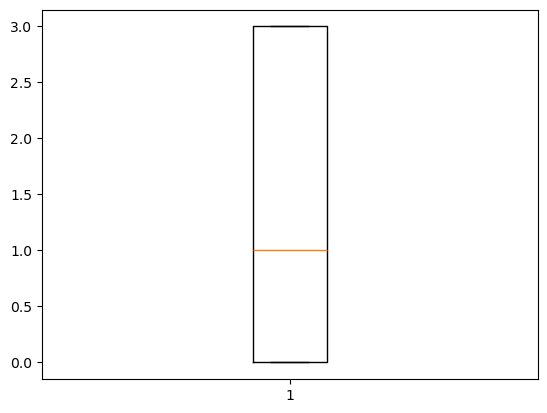

In [53]:
plt.boxplot(df['Condition'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d6932af00>,
 'caps': [<matplotlib.lines.Line2D at 0x21d6932b4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d6932ac30>],
 'medians': [<matplotlib.lines.Line2D at 0x21d6932ba70>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d6932bd10>],
 'means': []}

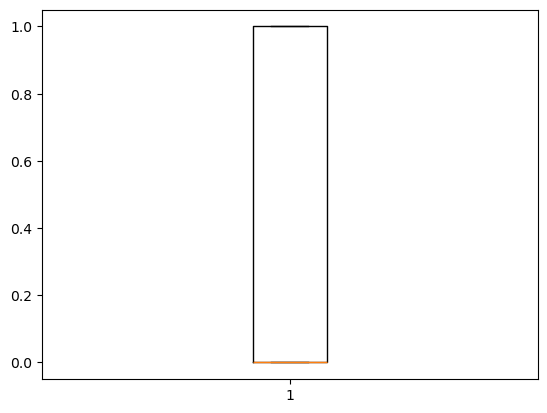

In [54]:
plt.boxplot(df['Garage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d69065580>,
 'caps': [<matplotlib.lines.Line2D at 0x21d69065b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d69065340>],
 'medians': [<matplotlib.lines.Line2D at 0x21d6937ec30>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d692f0140>],
 'means': []}

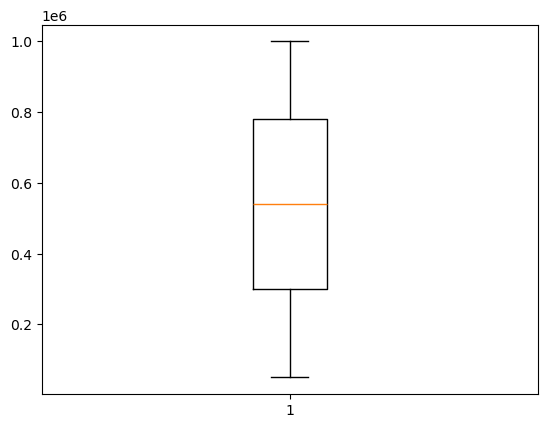

In [55]:
plt.boxplot(df['Price'])

# 5. Feature Scaling

In [56]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
pd.DataFrame(scaled_data, columns=df.columns)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,0.190974,1.00,1.000000,1.0,0.569106,0.000000,0.000000,0.0,0.105211
1,0.838373,1.00,1.000000,1.0,0.471545,0.000000,0.000000,0.0,0.394875
2,0.687194,0.25,0.333333,1.0,0.308943,0.000000,0.666667,0.0,0.228232
3,0.103379,0.75,0.333333,0.5,0.016260,0.666667,0.333333,1.0,0.204301
4,0.983771,0.00,1.000000,0.5,0.609756,0.000000,0.333333,1.0,0.617123
...,...,...,...,...,...,...,...,...,...
1995,0.998888,1.00,1.000000,1.0,0.186992,0.666667,1.000000,0.0,0.258637
1996,0.565807,1.00,0.333333,0.0,0.967480,0.666667,1.000000,1.0,0.559073
1997,0.124722,1.00,0.000000,0.5,0.024390,0.333333,1.000000,0.0,0.449555
1998,0.791685,0.50,0.000000,0.5,0.292683,1.000000,0.000000,1.0,0.117005


# 6. Split features and target

In [57]:
x = df.drop('Price',axis=1)
x

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,0,0,0
1,4272,5,4,3,1958,0,0,0
2,3592,2,2,3,1938,0,2,0
3,966,4,2,2,1902,2,1,1
4,4926,1,4,2,1975,0,1,1
...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,2,3,0
1996,3046,5,2,1,2019,2,3,1
1997,1062,5,1,2,1903,1,3,0
1998,4062,3,1,2,1936,3,0,1


In [58]:
y = df['Price']
y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

# 7. Train the model

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=43)

In [60]:
x_train.shape,x_test.shape

((1600, 8), (400, 8))

In [61]:
y_train.shape,y_test.shape

((1600,), (400,))

In [62]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [63]:
model.score(x_train,y_train)

0.005242919844617555

In [64]:
model.score(x_test,y_test)

-0.00889012918876797

In [65]:
y_pred = model.predict(x_test)
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

,Actual Value,Predicted Value
1480,456782,544794.039332
1312,811254,535405.963620
305,563611,526975.847084
1545,458449,535227.289277
1716,380502,562495.024357
...,...,...
1677,659019,541290.016602
731,674099,544955.938062
801,917784,534791.969578
1559,724053,498278.902641


In [66]:
mean_absolute_error(y_test,y_pred)

227969.7313132385

In [67]:
mean_squared_error(y_test,y_pred)

71888782268.14444

In [68]:
r2_score(y_test,y_pred)

-0.00889012918876797